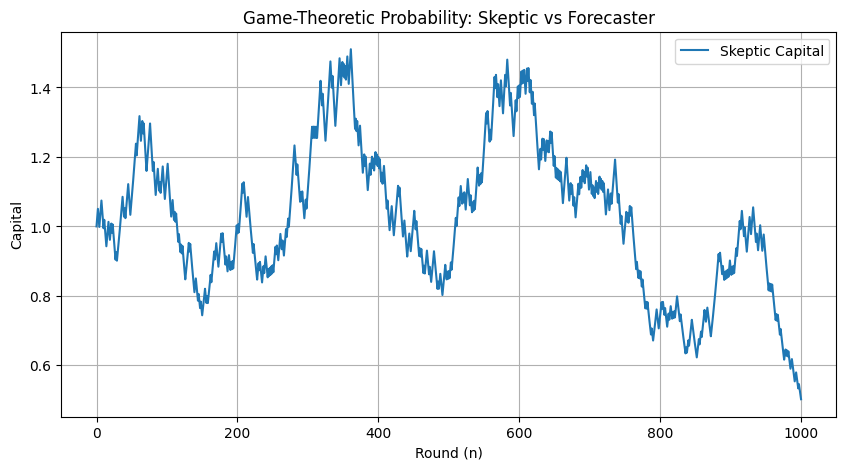

Final Capital: 0.502
Mean Forecast: 0.501
Mean Outcome:  0.494


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#  GAME-THEORETIC COIN SIMULATION


# Parameters
n_rounds = 1000           # number of coin tosses
true_p = 0.5              # true coin bias (Reality)
forecast_bias = 0.05      # Forecaster bias (e.g. predicts 0.55 instead of 0.5)
epsilon = 0.05            # Skeptic's betting fraction each round
C0 = 1.0                  # initial capital

# Arrays to store values
capital = np.zeros(n_rounds + 1)
forecasts = np.zeros(n_rounds)
outcomes = np.zeros(n_rounds)

capital[0] = C0

# Simulation loop
for i in range(n_rounds):
    # Forecaster announces probability
    v_i = true_p + forecast_bias * np.sin(i / 50)  # can vary slowly over time
    v_i = np.clip(v_i, 0.01, 0.99)  # keep in [0,1]
    forecasts[i] = v_i

    # Reality produces the outcome (1 = heads, 0 = tails)
    y_i = np.random.binomial(1, true_p)
    outcomes[i] = y_i

    # Skeptic bets a fraction epsilon of current capital
    phi_i = epsilon * capital[i]

    # Capital update (multiplicative form)
    capital[i+1] = capital[i] * (1 + epsilon * (y_i - v_i))

#  PLOTS


plt.figure(figsize=(10, 5))
plt.plot(capital, label='Skeptic Capital')
plt.xlabel('Round (n)')
plt.ylabel('Capital')
plt.title('Game-Theoretic Probability: Skeptic vs Forecaster')
plt.legend()
plt.grid(True)
plt.show()

# Print Summary Statistics
print(f"Final Capital: {capital[-1]:.3f}")
print(f"Mean Forecast: {forecasts.mean():.3f}")
print(f"Mean Outcome:  {outcomes.mean():.3f}")
